In [3]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dropout
from tensorflow import losses, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.models import *
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
import os
import json
import cv2
from numpy import asarray
%matplotlib inline

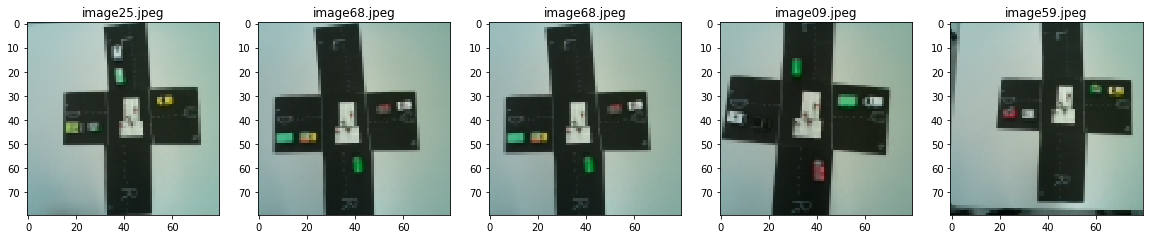

In [2]:
plt.figure(figsize=(20,20))
img_folder=r'C:\\Users\\Dhruba\\codes\\Project_IoT\\traffic_images\\Train'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [4]:
IMG_WIDTH=80
IMG_HEIGHT=80
img_folder=r'C:\\Users\\Dhruba\\codes\\Project_IoT\\traffic_images\\Train'
test_folder=r'C:\\Users\\Dhruba\\codes\\Project_IoT\\traffic_images\\Test'
#test_folder = r'C:\\Users\\Dhruba\\IoTProject\\IoT\\images'

In [5]:
def create_dataset(img_folder):
   
    img_data_array=[]
   
    for file in os.listdir(os.path.join(img_folder)):

        image_path= os.path.join(img_folder,  file)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255 
        img_data_array.append(image)
    return img_data_array

In [4]:
# extract the image array and class name
img_data = create_dataset(img_folder)
X_train = np.array(img_data)

(75, 80, 80, 3)

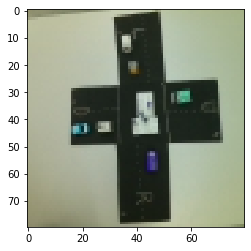

In [5]:
plt.imshow(X_train[23])
X_train.shape

In [6]:
y_train = np.array([[0, 2, 1, 0], [2, 2, 0, 2], [2, 2, 2, 2], [1, 2, 1, 2], [2, 1, 2, 1], [1, 1, 1, 0], [0, 2, 1, 1], #6
                    [0, 2, 1, 1], [0, 0, 2, 2], [0, 0, 2, 2], [2, 1, 1, 2], [1, 1, 1, 1], [2, 1, 0, 1], [2, 1, 0, 2], #13
                    [1, 1, 1, 2], [2, 1, 0, 1], [2, 1, 1, 1], [2, 1, 0, 1], [1, 2, 2, 2], [2, 2, 0, 1], [0, 1, 1, 0], #20
                    [0, 1, 2, 1], [0, 1, 0, 1], [2, 2, 1, 1], [2, 1, 0, 1], [1, 2, 0, 1], [2, 0, 1, 2], [2, 2, 2, 2], #27
                    [1, 1, 1, 1], [2, 1, 0, 0], [2, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1, 1, 1, 0], #34                   
                    [0, 1, 2, 1], [2, 0, 2, 0], [0, 1, 1, 1], [0, 2, 1, 2], [1, 1, 1, 2], [1, 2, 1, 1], [1, 2, 1, 1], #41                   
                    [1, 1, 2, 1], [1, 1, 1, 1], [0, 0, 2, 1], [2, 1, 0, 0], [2, 0, 2, 0], [2, 1, 1, 1], [0, 1, 0, 2], #48  
                    [0, 1, 0, 2], [1, 1, 0, 2], [1, 2, 1, 1], [1, 2, 1, 2], [0, 2, 0, 2], [0, 1, 0, 1], [0, 2, 1, 1], #55
                    [0, 0, 1, 1], [2, 0, 1, 1], [2, 1, 0, 0], [2, 1, 1, 0], [1, 0, 1, 1], [2, 0, 0, 1], [0, 2, 1, 2], #62 
                    [1, 1, 0, 0], [1, 1, 0, 1], [1, 0, 1, 1], [1, 0, 1, 2], [0, 0, 1, 1], [1, 0, 1, 1], [0, 1, 1, 2], #69                    
                    [1, 0, 1, 1], [0, 1, 0, 1], [0, 0, 2, 2], [2, 2, 2, 2], [0, 0, 0, 0]]) #74

y_train.shape

(75, 4)

In [6]:
img_data = create_dataset(test_folder)
X_test = np.array(img_data)
y_test = np.array([[1, 1, 1, 1], [2, 1, 0, 1], [2, 2, 2, 2], [0, 0, 1, 1], [2, 1, 0, 1]])

In [8]:
## Our Deep Neural Network ##
def CstmNet(input_shape=(80, 80, 3)):

    X1_input = Input(input_shape)
    
############ First input branch ######################

    X1 = Conv2D(16, 3, strides=1, padding="same")(X1_input)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling2D(3, strides=2)(X1)     
    

    X1 = Conv2D(16, 3, strides=1, padding="same")(X1)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling2D(3, strides=2)(X1)    
      
    X1 = Conv2D(16, 3, strides=1, padding="same")(X1)
    X1 = BatchNormalization(axis=-1)(X1)
    X1 = Activation('relu')(X1)
    X1 = MaxPooling2D(3, strides=3)(X1)    
        

    #X = AveragePooling2D()(X1)
    X = Flatten()(X1)
    
############ Final Layer ######################
    
    #X = Dropout(0.1)(X)
    X = Dense(128, activation='relu')(X)
    X = Dropout(0.1)(X)
    output = Dense(4)(X) 
    model = Model(inputs=X1_input, outputs=output, name='CstmNet_DDD')
    
    return model

model = CstmNet(input_shape=(80, 80, 3))
model.summary()

Model: "CstmNet_DDD"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 80, 80, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 80, 80, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 80, 80, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 39, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 16)        

In [9]:
# fit the model on all data

LR = 0.0001
optim = optimizers.Adam(learning_rate=LR)

model.compile(optimizer=optim, loss = 'mae', metrics=['accuracy'])

filepath = 'traffic.ep{epoch:02d}-acc{val_accuracy:.3f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=False,
                             mode='max')
callbacks = [checkpoint]

result = model.fit(x=X_train,
                    y=y_train,
                    batch_size = 25,
                    epochs = 100,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks,
                    shuffle=True)

Epoch 1/100
3/3 [==============================] - 1s 296ms/step - loss: 2.3230 - accuracy: 0.1467 - val_loss: 1.2540 - val_accuracy: 0.2000

Epoch 00001: saving model to traffic.ep01-acc0.200.hdf5
Epoch 2/100
3/3 [==============================] - 0s 99ms/step - loss: 1.7933 - accuracy: 0.1200 - val_loss: 1.2232 - val_accuracy: 0.2000

Epoch 00002: saving model to traffic.ep02-acc0.200.hdf5
Epoch 3/100
3/3 [==============================] - 0s 98ms/step - loss: 1.3801 - accuracy: 0.1333 - val_loss: 1.1952 - val_accuracy: 0.2000

Epoch 00003: saving model to traffic.ep03-acc0.200.hdf5
Epoch 4/100
3/3 [==============================] - 0s 98ms/step - loss: 1.0510 - accuracy: 0.1867 - val_loss: 1.1693 - val_accuracy: 0.2000

Epoch 00004: saving model to traffic.ep04-acc0.200.hdf5
Epoch 5/100
3/3 [==============================] - 0s 117ms/step - loss: 0.8754 - accuracy: 0.1733 - val_loss: 1.1453 - val_accuracy: 0.2000

Epoch 00005: saving model to traffic.ep05-acc0.200.hdf5
Epoch 6/100
3

3/3 [==============================] - 0s 99ms/step - loss: 0.3011 - accuracy: 0.6267 - val_loss: 0.9705 - val_accuracy: 0.0000e+00

Epoch 00083: saving model to traffic.ep83-acc0.000.hdf5
Epoch 84/100
3/3 [==============================] - 0s 103ms/step - loss: 0.3000 - accuracy: 0.6267 - val_loss: 0.9684 - val_accuracy: 0.0000e+00

Epoch 00084: saving model to traffic.ep84-acc0.000.hdf5
Epoch 85/100
3/3 [==============================] - 0s 109ms/step - loss: 0.2999 - accuracy: 0.6267 - val_loss: 0.9709 - val_accuracy: 0.0000e+00

Epoch 00085: saving model to traffic.ep85-acc0.000.hdf5
Epoch 86/100
3/3 [==============================] - 0s 97ms/step - loss: 0.3204 - accuracy: 0.6267 - val_loss: 0.9737 - val_accuracy: 0.0000e+00

Epoch 00086: saving model to traffic.ep86-acc0.000.hdf5
Epoch 87/100
3/3 [==============================] - 0s 103ms/step - loss: 0.3039 - accuracy: 0.6000 - val_loss: 0.9751 - val_accuracy: 0.0000e+00

Epoch 00087: saving model to traffic.ep87-acc0.000.hdf5


In [7]:
best_model = load_model('traffic.ep04-acc1.000.hdf5', compile = False)

In [21]:
y_pred = best_model.predict(X_test)

In [22]:
y_pred

array([[2.57435  , 1.5774627, 1.5764257, 1.1983364],
       [2.7183673, 1.4121592, 2.471075 , 1.5500482],
       [2.7463493, 2.1966264, 1.1326652, 2.1020908],
       [1.959545 , 0.6828505, 1.2738221, 2.2738318],
       [3.3876626, 0.8929666, 1.9938335, 1.6549461]], dtype=float32)

In [11]:
y = np.round(y_pred)
y

array([[3., 2., 2., 1.],
       [3., 1., 2., 2.],
       [3., 2., 1., 2.],
       [2., 1., 1., 2.],
       [3., 1., 2., 2.]], dtype=float32)

array([3., 1., 2., 2.], dtype=float32)

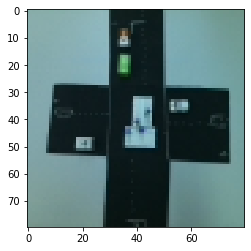

In [24]:
test_case = 4
plt.imshow(X_test[test_case])
y_pred1 = np.round(y_pred[test_case])
y_pred1

In [5]:
def create_dataset(img_folder):
   
    img_data_array=[]
   
    for file in os.listdir(os.path.join(img_folder)):

        image_path= os.path.join(img_folder,  file)
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float32')
        image /= 242 
        #print(image.shape)
        #print(np.max(image))
        img_data_array.append(image)
    return img_data_array

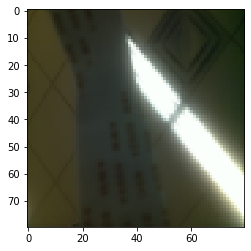

In [6]:
img_data = create_dataset(test_folder)
X_test = np.array(img_data)
plt.imshow(X_test[0])
#print(np.round(y_pred[test_case]))

In [16]:
import time
def periodic_work(interval):
    while True:
        #change this to the function you want to call, or paste in the code you want to run
        img_data = create_dataset(test_folder)
        X_test = np.array(img_data)
        y_pred = best_model.predict(X_test)
        y_pred = np.round(y_pred)
        print(y_pred)
        plt.imshow(X_test[0])
        #interval should be an integer, the number of seconds to wait
        time.sleep(interval)

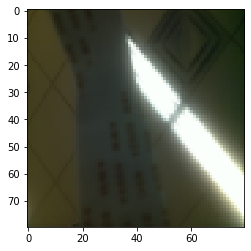

In [17]:
plt.imshow(X_test[0])

[[1. 0. 1. 2.]]
[[1. 1. 2. 2.]]
[[1. 1. 2. 2.]]
[[1. 1. 2. 2.]]
[[1. 1. 1. 1.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-0.  0.  2.  2.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0. 0. 2. 2.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 1. 1. 2.]]
[[ 3. -0.  2.  2.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[3. 1. 2. 1.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 1. 1. 1.]]


KeyboardInterrupt: 

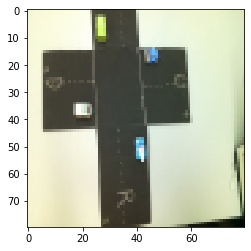

In [22]:
periodic_work(5)

In [ ]:
# y_train = np.array([[2, 2, 1, 1], [2, 2, 3, 3], [2, 2, 1, 3], [1, 2, 1, 2], [1, 1, 1, 2], [3, 1, 1, 1], [2, 1, 1, 3],
#                     [1, 1, 1, 2], [2, 2, 3, 1], [1, 4, 3, 2], [2, 1, 1, 1], [2, 1, 1, 1], [1, 1, 1, 1], [1, 0, 1, 1],
#                     [1, 0, 1, 0], [2, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 2], [0, 1, 1, 2], [2, 0, 1, 0],
#                     [2, 0, 1, 1], [1, 1, 2, 2], [1, 0, 2, 1], [1, 1, 1, 1], [2, 3, 3, 3], [3, 4, 2, 3], [4, 3, 2, 4],
#                     [4, 4, 0, 5], [1, 3, 0, 5], [1, 2, 0, 5], [0, 0, 6, 2], [1, 3, 0, 4], [6, 1, 0, 1], [6, 0, 2, 0],
#                     [8, 0, 1, 4], [4, 3, 3, 3], [4, 4, 2, 3], [4, 3, 4, 2], [6, 0, 4, 3], [5, 0, 4, 4], [4, 2, 4, 3],
#                     [4, 2, 4, 3], [2, 5, 3, 3], [1, 4, 4, 4], [0, 0, 4, 0], [2, 0, 4, 0], [2, 0, 4, 2], [0, 2, 3, 3],
#                     [3, 3, 2, 0], [3, 4, 3, 3], [0, 4, 5, 4]])


In [40]:
a

array([2.57435  , 1.5774627, 1.5764257, 1.1983364], dtype=float32)

In [58]:
# Data to be written
a = np.round(y_pred[0][0])
b = np.round(y_pred[0][1])
c = np.round(y_pred[0][2])
d = np.round(y_pred[0][3])
vehicles = [a,b,c,d] 

trafficTime = [] 

for cars in vehicles: 
    trafficTime.append(4+(cars*3)) 

#for timePerWay in trafficTime:
    #print(timePerWay)

dictionary = {
    "numCarsOne": str(a), 
    "numCarsTwo": str(b),
    "numCarsThree": str(c),
    "numCarsFour": str(d),
    
    "lightOneInterval": str(trafficTime[0]),
    "lightTwoInterval": str(trafficTime[1]),
    "lightThreeInterval": str(trafficTime[2]),
    "lightFourInterval": str(trafficTime[3])
}
 
with open("trafic_light_update.json", "w") as outfile:
    json.dump(dictionary, outfile)

TypeError: Object of type float32 is not JSON serializable

In [54]:
trafficTime

[11.723050355911255, 8.732388019561768, 8.72927701473236, 7.595009088516235]